# 뉴스 기사 분류 : 다중 분류 문제
1986년 로이터에서 공개한 뉴스기사와 토픽의 집합인 로이터 데이터셋을 사용  
타겟데이터셋이 46개의 클래스를 가짐.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
from tensorflow.keras.datasets import reuters
(train,train_label),(test,test_label)=reuters.load_data(num_words=10000)

## 데이터셋 확인

### Train datasets

In [101]:
train[:10]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [102]:
train_label[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16], dtype=int64)

In [103]:
# 클래스 수 확인
len(set(train_label))

46

In [104]:
# Train데이터 확인
len(train)

8982

### Test datasets

In [105]:
test[:10]

array([list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]),
       list([1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13, 260

In [106]:
test_label[:10]

array([ 3, 10,  1,  4,  4,  3,  3,  3,  3,  3], dtype=int64)

In [107]:
# 클래스 수 확인
len(set(test_label))

46

In [108]:
# Test데이터 확인
len(test)

2246

### 뉴스데이터 출력 예시

In [109]:
word_index=reuters.get_word_index()
decode=dict([(value,key) for (key,value) in word_index.items()])
decode_news=' '.join([decode.get(i-3,' ') for i in train[0]]) 

In [110]:
decode_news

'      said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

#### 정수 시퀀스를 멀티-핫 인코딩

In [111]:
import numpy as np

In [112]:
def vectorize_sequences(sequences,dimension=10000):
    res=np.zeros((len(sequences),dimension))
    for i,seq in enumerate(sequences):
        for j in seq:
            res[i,j]=1.
    return res

In [113]:
X_tr=vectorize_sequences(train)
X_te=vectorize_sequences(test)

In [114]:
X_tr

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

#### 레이블을 벡터로 변환

In [115]:
from keras.utils.np_utils import to_categorical

In [116]:
y_tr=to_categorical(train_label)
y_te=to_categorical(test_label)

## 모델 구성

In [117]:
from tensorflow import keras
from tensorflow.keras import layers

In [118]:
model=keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(46,activation='softmax')
])

In [119]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [120]:
X_val=X_tr[:1000]
X_tr2=X_tr[1000:]
y_val=y_tr[:1000]
y_tr2=y_tr[1000:]

## 학습

In [121]:
history=model.fit(X_tr2,y_tr2,
                  epochs=20,
                  batch_size=512,
                  validation_data=(X_val,y_val))

Epoch 1/20
16/16 [==============================] - 3s 75ms/step - loss: 2.5492 - accuracy: 0.5335 - val_loss: 1.6887 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.3892 - accuracy: 0.7142 - val_loss: 1.2798 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 56ms/step - loss: 1.0311 - accuracy: 0.7835 - val_loss: 1.1028 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8068 - accuracy: 0.8331 - val_loss: 1.0086 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6408 - accuracy: 0.8653 - val_loss: 0.9475 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5146 - accuracy: 0.8914 - val_loss: 0.9224 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4147 - accuracy: 0.9132 - val_loss: 0.8796 - val_accuracy: 0.8190
Epoch 8/20
16

In [122]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [123]:
res=pd.DataFrame(history.history,columns=history.history.keys())
res

,loss,accuracy,val_loss,val_accuracy
0,2.549184,0.533450,1.688652,0.646
1,1.389228,0.714232,1.279839,0.722
2,1.031134,0.783513,1.102766,0.767
3,0.806807,0.833125,1.008609,0.789
4,0.640775,0.865322,0.947496,0.794
5,0.514592,0.891381,0.922431,0.810
6,0.414715,0.913180,0.879618,0.819
7,0.336804,0.929967,0.891648,0.812
8,0.280063,0.940742,0.875634,0.820
9,0.236206,0.944625,0.909712,0.816


##  손실함수 비교

Text(0, 0.5, 'loss')

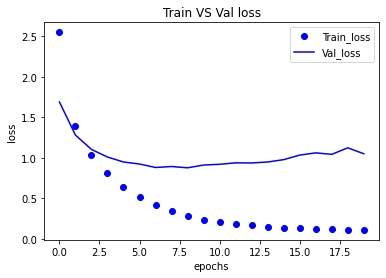

In [124]:
plt.plot(res.index,res.loss,'bo',label='Train_loss')
plt.plot(res.index,res.val_loss,'b',label='Val_loss')
plt.legend()
plt.title('Train VS Val loss')
plt.xlabel('epochs')
plt.ylabel('loss')

## 정확도 비교

Text(0, 0.5, 'accuracy')

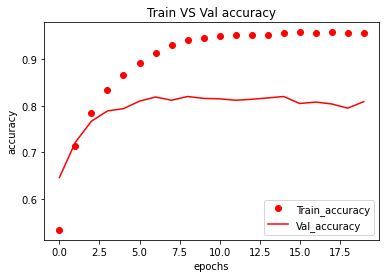

In [125]:
plt.plot(res.index,res.accuracy,'ro',label='Train_accuracy')
plt.plot(res.index,res.val_accuracy,'r',label='Val_accuracy')
plt.legend()
plt.title('Train VS Val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

아홉번쨰 epochs부터 과대적합이 된것으로 보임

## 재학습

In [126]:
model=keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(46,activation='softmax')
])
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics='accuracy')
model.fit(X_tr2,y_tr2,
         epochs=9,
         batch_size=512,
         validation_data=(X_val,y_val))

Epoch 1/9
16/16 [==============================] - 3s 94ms/step - loss: 2.6966 - accuracy: 0.5301 - val_loss: 1.7570 - val_accuracy: 0.6500
Epoch 2/9
16/16 [==============================] - 1s 55ms/step - loss: 1.4163 - accuracy: 0.7067 - val_loss: 1.3206 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0397 - accuracy: 0.7771 - val_loss: 1.1435 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8186 - accuracy: 0.8309 - val_loss: 1.0399 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6508 - accuracy: 0.8697 - val_loss: 0.9763 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.5214 - accuracy: 0.8964 - val_loss: 0.9194 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4179 - accuracy: 0.9166 - val_loss: 0.9045 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [127]:
result=model.evaluate(X_te,y_te)

71/71 [==============================] - 0s 5ms/step - loss: 1.0107 - accuracy: 0.7805


In [128]:
result

[1.0107144117355347, 0.7804986834526062]

## 새로운데이터 모델로 예측해보기

In [129]:
pred=model.predict(X_te)

71/71 [==============================] - 0s 4ms/step


In [130]:
pred[0].max()

0.6594434

In [131]:
pred[0].argmax()

4

## 레이블 인코딩 다른 방법
loss함수가 categorical_crossentropy이면 범주형 인코딩이 되어있을 것으로 기대함.  
그러나 정수형 인코딩이 되어있다면 sparse_categorical_crossentropy를 사용.  
두 인코딩방식은 인터페이스만 다르고 수학적으로는 동일함

In [132]:
y_tr=np.array(train_label)
y_val=y_tr[:1000]
y_tr2=y_tr[1000:]
y_te=np.array(test_label)

In [133]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

In [134]:
history=model.fit(X_tr2,y_tr2,
         epochs=20,
         batch_size=512,
         validation_data=(X_val,y_val))

Epoch 1/20
16/16 [==============================] - 3s 78ms/step - loss: 0.2653 - accuracy: 0.9415 - val_loss: 0.8918 - val_accuracy: 0.8280
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 0.1991 - accuracy: 0.9499 - val_loss: 0.9175 - val_accuracy: 0.8210
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 0.1781 - accuracy: 0.9513 - val_loss: 0.9342 - val_accuracy: 0.8170
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.1623 - accuracy: 0.9524 - val_loss: 0.9361 - val_accuracy: 0.8170
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.1475 - accuracy: 0.9550 - val_loss: 0.9676 - val_accuracy: 0.8200
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.1357 - accuracy: 0.9553 - val_loss: 0.9746 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1330 - accuracy: 0.9560 - val_loss: 1.0181 - val_accuracy: 0.8100
Epoch 8/20
16

## 은닉층 크기를 크게 만들어 모델 생성

In [135]:
model=keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(46,activation='softmax')
])
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

In [136]:
history=model.fit(X_tr2,y_tr2,
                 epochs=20,
                 batch_size=512,
                 validation_data=(X_val,y_val))

Epoch 1/20
16/16 [==============================] - 4s 107ms/step - loss: 2.2307 - accuracy: 0.5659 - val_loss: 1.3904 - val_accuracy: 0.6930
Epoch 2/20
16/16 [==============================] - 1s 65ms/step - loss: 1.1282 - accuracy: 0.7551 - val_loss: 1.0993 - val_accuracy: 0.7670
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 0.8035 - accuracy: 0.8256 - val_loss: 0.9870 - val_accuracy: 0.7930
Epoch 4/20
16/16 [==============================] - 1s 66ms/step - loss: 0.5823 - accuracy: 0.8756 - val_loss: 0.9012 - val_accuracy: 0.8080
Epoch 5/20
16/16 [==============================] - 1s 71ms/step - loss: 0.4348 - accuracy: 0.9094 - val_loss: 0.9476 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 64ms/step - loss: 0.3332 - accuracy: 0.9257 - val_loss: 0.8581 - val_accuracy: 0.8240
Epoch 7/20
16/16 [==============================] - 1s 70ms/step - loss: 0.2517 - accuracy: 0.9424 - val_loss: 0.9140 - val_accuracy: 0.8020
Epoch 8/20
1

In [137]:
res2=pd.DataFrame(history.history,columns=history.history.keys())

In [138]:
res2

,loss,accuracy,val_loss,val_accuracy
0,2.230650,0.565898,1.390424,0.693
1,1.128213,0.755074,1.099321,0.767
2,0.803453,0.825608,0.987005,0.793
3,0.582278,0.875595,0.901164,0.808
4,0.434815,0.909421,0.947555,0.802
5,0.333227,0.925708,0.858104,0.824
6,0.251743,0.942370,0.913951,0.802
7,0.209970,0.948885,0.896453,0.821
8,0.184173,0.950764,0.918165,0.815
9,0.167856,0.950890,1.009366,0.800


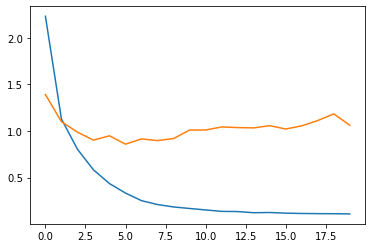

In [140]:
plt.plot(res2.index,res2.loss)
plt.plot(res2.index,res2.val_loss)

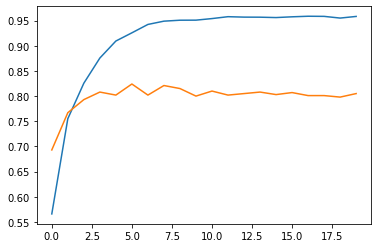

In [141]:
plt.plot(res2.index,res2.accuracy)
plt.plot(res2.index,res2.val_accuracy)

8번째 에포크까지만 재학습

In [142]:
model=keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(46,activation='softmax')
])
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')
history=model.fit(X_tr2,y_tr2,
                 epochs=8,
                 batch_size=512,
                 validation_data=(X_val,y_val))

Epoch 1/8
16/16 [==============================] - 3s 113ms/step - loss: 2.2343 - accuracy: 0.5674 - val_loss: 1.3808 - val_accuracy: 0.6930
Epoch 2/8
16/16 [==============================] - 1s 71ms/step - loss: 1.1114 - accuracy: 0.7595 - val_loss: 1.1067 - val_accuracy: 0.7640
Epoch 3/8
16/16 [==============================] - 1s 70ms/step - loss: 0.7721 - accuracy: 0.8327 - val_loss: 0.9635 - val_accuracy: 0.8060
Epoch 4/8
16/16 [==============================] - 1s 64ms/step - loss: 0.5636 - accuracy: 0.8814 - val_loss: 0.9068 - val_accuracy: 0.8100
Epoch 5/8
16/16 [==============================] - 1s 64ms/step - loss: 0.4024 - accuracy: 0.9158 - val_loss: 0.8865 - val_accuracy: 0.8180
Epoch 6/8
16/16 [==============================] - 1s 64ms/step - loss: 0.3140 - accuracy: 0.9322 - val_loss: 0.9172 - val_accuracy: 0.8100
Epoch 7/8
16/16 [==============================] - 1s 65ms/step - loss: 0.2441 - accuracy: 0.9450 - val_loss: 0.9018 - val_accuracy: 0.8070
Epoch 8/8
16/16 [==

In [148]:
res_fin=model.evaluate(X_te,y_te)

71/71 [==============================] - 0s 6ms/step - loss: 1.0178 - accuracy: 0.7925


In [149]:
res_fin

[1.017831802368164, 0.7925200462341309]

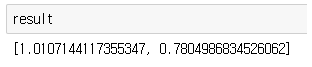
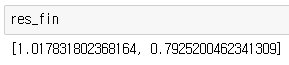

중간층의 크기를 64로 작게 했을 때보다 128배로 크게해서 학습했을때 모델성능이 향상된것으로 보임  
출력이 46차원이므로 충분히 큰 은닉층이 있어야 모델의 성능이 더 좋아짐.